### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the data

In [2]:
data = pd.read_csv(r"C:\Users\arund\Downloads\titanic_dataset .csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### EDA

[Text(0, 0, '549'), Text(0, 0, '342')]

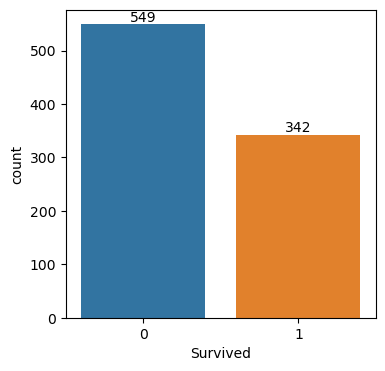

In [8]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Survived',data = data)
ax.bar_label(ax.containers[0])

[Text(0, 0, '216'), Text(0, 0, '184'), Text(0, 0, '491')]

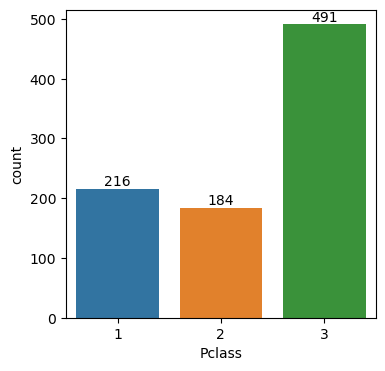

In [9]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Pclass',data = data)
ax.bar_label(ax.containers[0])

[Text(0, 0, '577'), Text(0, 0, '314')]

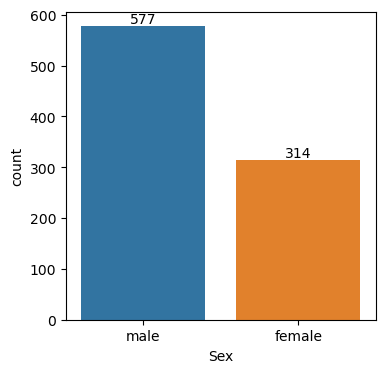

In [10]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Sex',data = data)
ax.bar_label(ax.containers[0])

[Text(0, 0, '608'),
 Text(0, 0, '209'),
 Text(0, 0, '28'),
 Text(0, 0, '16'),
 Text(0, 0, '18'),
 Text(0, 0, '5'),
 Text(0, 0, '7')]

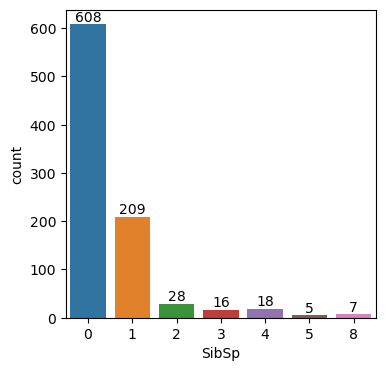

In [11]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='SibSp',data = data)
ax.bar_label(ax.containers[0])

[Text(0, 0, '678'),
 Text(0, 0, '118'),
 Text(0, 0, '80'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '1')]

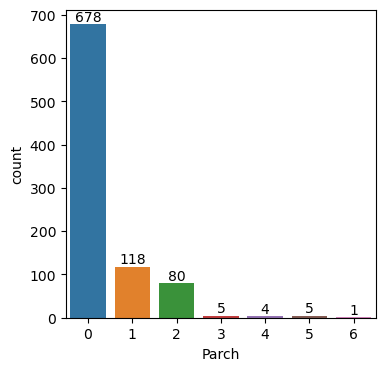

In [12]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Parch',data = data)
ax.bar_label(ax.containers[0])

[Text(0, 0, '644'), Text(0, 0, '168'), Text(0, 0, '77')]

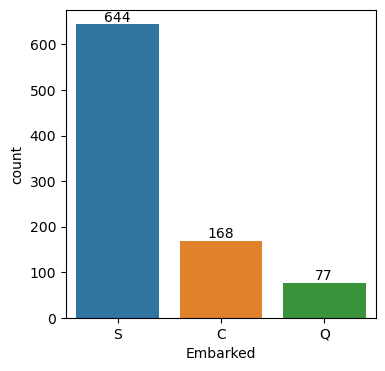

In [13]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Embarked',data = data)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Age', ylabel='Density'>

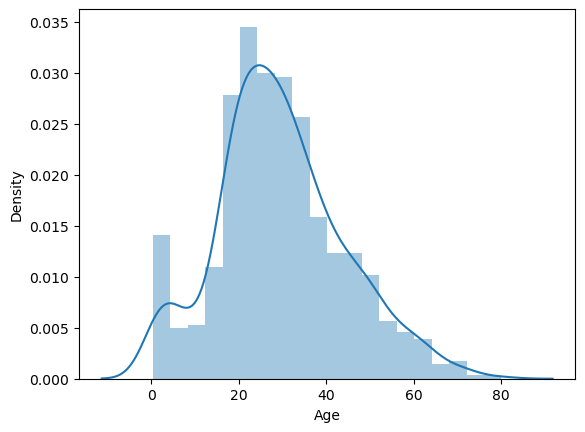

In [14]:
## Numerical attributes

sns.distplot(data['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

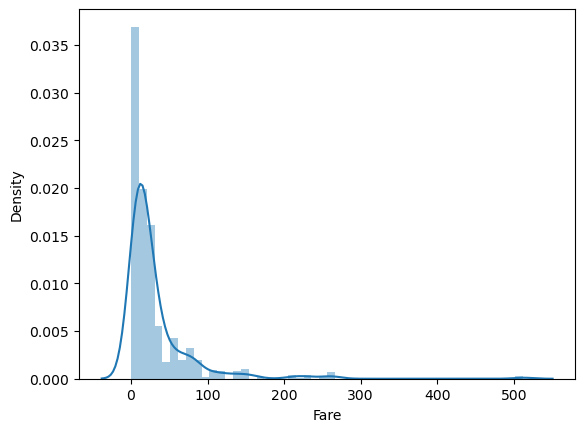

In [15]:
sns.distplot(data['Fare'])

Here we have to remove the outliers

In [16]:
table = data.pivot_table(index=['Pclass'],values='Fare')
table

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


<Figure size 200x200 with 0 Axes>

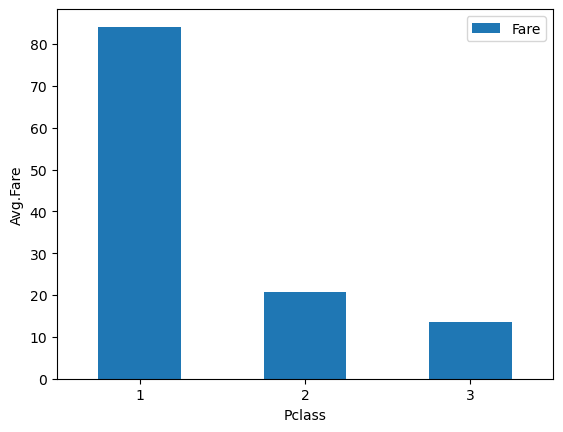

In [17]:
plt.figure(figsize=(2,2))
table.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare')
plt.xticks(rotation=0)
plt.show()


## Data Pre-Processing

###  1) Handling Missing Values

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [20]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
data['Embarked'] = data['Embarked'].fillna("S")

In [22]:
# Using drop function to exclude un-insightful columns

data1 = data.drop(['PassengerId','Name','Cabin','Ticket','Embarked'],axis=1)
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [23]:
data1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### 2) Checking and handling outliers

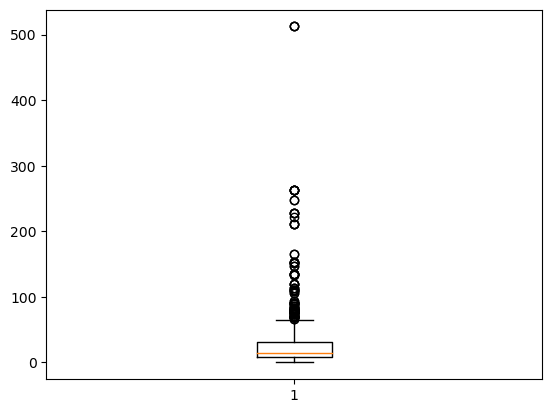

In [24]:
plt.boxplot(data1['Fare'])
plt.show()

In [25]:
# IQR method to remove outliers

Q1 = np.percentile(data1['Fare'],25,method='midpoint')
Q2 = np.percentile(data1['Fare'],50,method='midpoint')
Q3 = np.percentile(data1['Fare'],75,method='midpoint')

In [26]:
print("Q1 is ",Q1)
print("Q2 is ",Q2)
print("Q3 is ",Q3)

Q1 is  7.9104
Q2 is  14.4542
Q3 is  31.0


In [27]:
IQR = Q3-Q1
IQR

23.0896

In [28]:
low_lim = Q1-IQR*1.5
up_lim = Q3+1.5*IQR

print("lower limit is ",low_lim)
print("upper limit is ",up_lim)

lower limit is  -26.724
upper limit is  65.6344


In [29]:
outlier=[]
for x in data1['Fare']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [30]:
data1['Fare'] = data1['Fare'].clip(lower=low_lim , upper=up_lim)

In [31]:
outlier=[]
for x in data1['Fare']:
     if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

outlier

[]

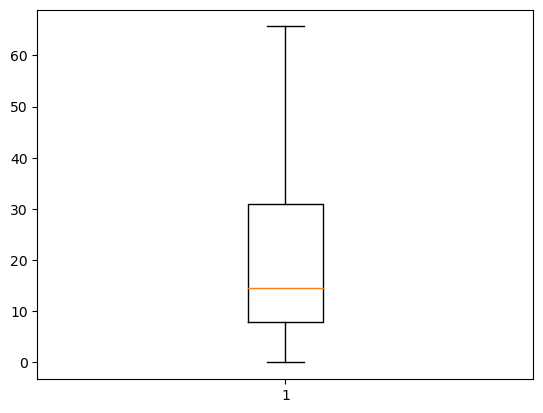

In [32]:
plt.boxplot(data1['Fare'])
plt.show();

In [33]:
data1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### 3) Encoding

In [34]:
data1 = pd.get_dummies(data1,dtype=int)

In [35]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,65.6344,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


### Splitting the data

In [36]:
y = data1['Survived']
X = data1.drop(['Survived'],axis = 1)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30 , random_state = 42)

## Modeling

## 1) K-NN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

In [40]:
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score

In [41]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

[0.6902985074626866,
 0.7126865671641791,
 0.7350746268656716,
 0.7089552238805971,
 0.7164179104477612,
 0.7201492537313433,
 0.7313432835820896,
 0.7052238805970149,
 0.7052238805970149,
 0.7052238805970149,
 0.6977611940298507,
 0.7164179104477612,
 0.7126865671641791,
 0.6865671641791045]

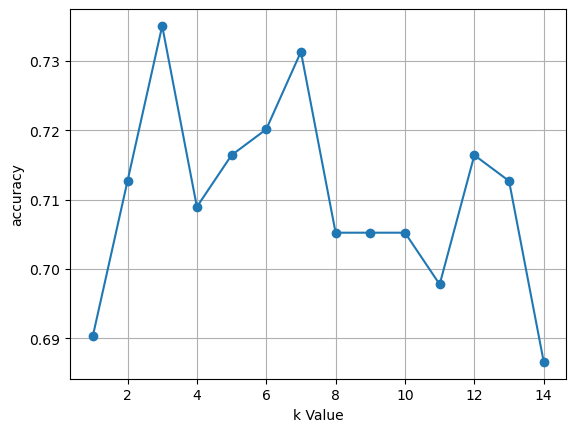

In [42]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [43]:
classifier1 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier1.fit(X_train,y_train)
y_pred_knn = classifier1.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn))
print('Recall is', recall_score(y_test, y_pred_knn))
print('F1 Score is', f1_score(y_test, y_pred_knn))


Accuracy is 0.7350746268656716
Precision is 0.7380952380952381
Recall is 0.5585585585585585
F1 Score is 0.6358974358974359


In [44]:
classifier2 = KNeighborsClassifier(n_neighbors=3, metric='minkowski',p=1) 
classifier2.fit(X_train,y_train)
y_pred_knn = classifier2.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn))
print('Recall is', recall_score(y_test, y_pred_knn))
print('F1 Score is', f1_score(y_test, y_pred_knn))


Accuracy is 0.7388059701492538
Precision is 0.7157894736842105
Recall is 0.6126126126126126
F1 Score is 0.6601941747572815


In [45]:
classifier3 = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
classifier3.fit(X_train,y_train)
y_pred_knn = classifier3.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn))
print('Recall is', recall_score(y_test, y_pred_knn))
print('F1 Score is', f1_score(y_test, y_pred_knn))


Accuracy is 0.7388059701492538
Precision is 0.7157894736842105
Recall is 0.6126126126126126
F1 Score is 0.6601941747572815


## Applying K-Fold Cross validation

In [46]:
from sklearn.model_selection import cross_val_score,KFold
kf = KFold(n_splits = 10)

In [47]:
# Printing the folds

for train_index , test_index in kf.split(X,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [48]:
# Calculating the cross validation scores for the folds

score = cross_val_score(classifier2,X,y, cv=kf)
print('Cross validation scores are : {}'.format(score))

Cross validation scores are : [0.72222222 0.75280899 0.71910112 0.79775281 0.82022472 0.7752809
 0.78651685 0.73033708 0.75280899 0.79775281]


In [49]:
# Getting the average cross validation score

print(' Average Cross validation score : {}'.format(score.mean()))

 Average Cross validation score : 0.7654806491885143


## Applying Stratified K-Fold Cross validation

In [50]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits = 10)

In [51]:
for train_index , test_index in skfold_validator.split(X,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [52]:
# Calculating the cross validation scores for the folds

skvc_result = cross_val_score(classifier2,X,y, cv = skfold_validator)
skvc_result

array([0.73333333, 0.74157303, 0.68539326, 0.80898876, 0.85393258,
       0.76404494, 0.79775281, 0.74157303, 0.74157303, 0.79775281])

In [53]:
# Getting the average cross validation score

print('Average cross validation score : {}'.format(skvc_result.mean()))

Average cross validation score : 0.7665917602996255


## 2) SVM

In [54]:
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'linear')
svm_clf.fit(X_train,y_train)
y_svm_prediction = svm_clf.predict(X_test)

In [55]:
print(confusion_matrix(y_test,y_svm_prediction))

[[134  23]
 [ 33  78]]


In [56]:
print('Accuracy is', accuracy_score(y_test, y_svm_prediction))

Accuracy is 0.7910447761194029


In [57]:
svm_clf1 = SVC(kernel = 'rbf')
svm_clf1.fit(X_train,y_train)
y_svm_prediction1 = svm_clf1.predict(X_test)
print(confusion_matrix(y_test,y_svm_prediction1))


[[145  12]
 [ 73  38]]


In [58]:
print('Accuracy is', accuracy_score(y_test, y_svm_prediction1))

Accuracy is 0.6828358208955224


In [59]:
svm_clf2 = SVC(kernel = 'poly')
svm_clf2.fit(X_train,y_train)
y_svm_prediction2 = svm_clf2.predict(X_test)
print(confusion_matrix(y_test,y_svm_prediction2))

[[152   5]
 [ 80  31]]


In [60]:
print('Accuracy is', accuracy_score(y_test, y_svm_prediction2))

Accuracy is 0.6828358208955224


Accuracy is greater for SVC using linear kernel so we can apply Cross validation to this method

## K-Fold Cross validation

In [61]:
kf = KFold(n_splits = 10)

In [62]:
# Printing the folds

for train_index , test_index in kf.split(X,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [63]:
# Calculating cross validation score for the folds

score = cross_val_score(svm_clf,X,y, cv=kf)
print('Cross validation scores are : {}'.format(score))

Cross validation scores are : [0.81111111 0.82022472 0.75280899 0.84269663 0.76404494 0.79775281
 0.74157303 0.73033708 0.84269663 0.76404494]


In [64]:
# Getting the average cross validation score

print(' Average Cross validation score : {}'.format(score.mean()))

 Average Cross validation score : 0.786729088639201


## Stratified K-Fold Cross validation

In [65]:
skfold_validator = StratifiedKFold(n_splits = 10)

In [66]:
for train_index , test_index in skfold_validator.split(X,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [67]:
# Calculating cross validation score for the folds

skvc_result = cross_val_score(svm_clf,X,y, cv = skfold_validator)
skvc_result

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [68]:
# Getting the average Cross validation score

print('Average cross validation score : {}'.format(skvc_result.mean()))

Average cross validation score : 0.786729088639201


 Average accuracy score of K-NN Classifier using K-fold CV = 0.7654806491885143
 
 Average accuracy score of K-NN Classifier using stratified K-fold CV = 0.7665917602996255
 
 Average accuracy score of SVM model using K-fold CV = 0.786729088639201
 
 Average accuracy score of SVM model using stratified K-fold CV =0.786729088639201 